In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (15, 7),
          'axes.labelsize': 25,
          'axes.titlesize': 21,
          'xtick.labelsize': 23,
          'ytick.labelsize': 23,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 7,
          'font.family': 'sans-serif'}


plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

In [17]:
# See screenshots from LSA at: 
length_lof = 0.705
length_lod = 0.677

In [18]:
lof_data = pd.read_csv('./tables/SPS_LOF_cal.csv').drop(0)
lod_data = pd.read_csv('./tables/SPS_LOD_cal.csv').drop(0)

In [19]:
lof_data_keys = lof_data.keys()
lod_data_keys = lod_data.keys()

In [20]:
# convert columns from string to float
current_lof = lof_data[lof_data_keys[1]].astype(float)
b3l_lof =  lof_data[lof_data_keys[0]].astype(float)

current_lod = lod_data[lod_data_keys[1]].astype(float)
b3l_lod =  lod_data[lod_data_keys[0]].astype(float)

Text(0.5, 0, 'B3l [T/m^2]')

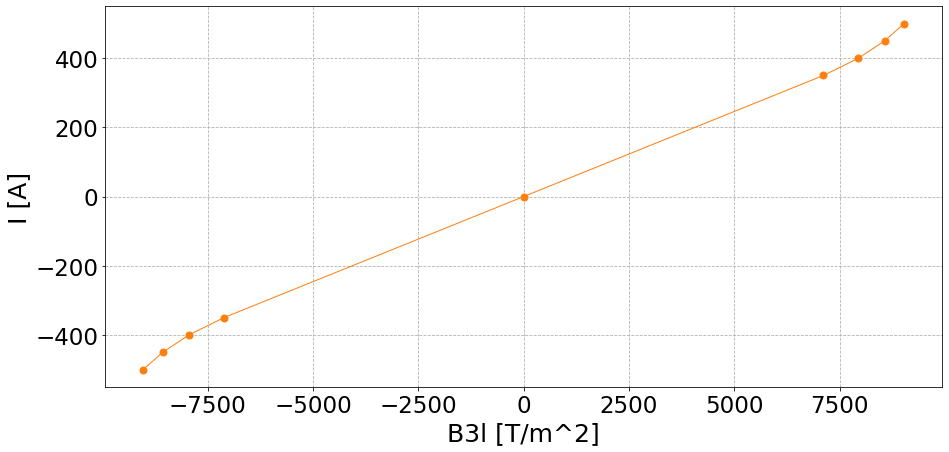

In [21]:
fig, ax = plt.subplots(1,1)
ax.plot(b3l_lof, current_lof, '-o', c='C1')
ax.grid(ls='--')


ax.set_ylabel('I [A]')
ax.set_xlabel('B3l [T/m^2]')

Text(0.5, 0, 'B3 [T/m^3]')

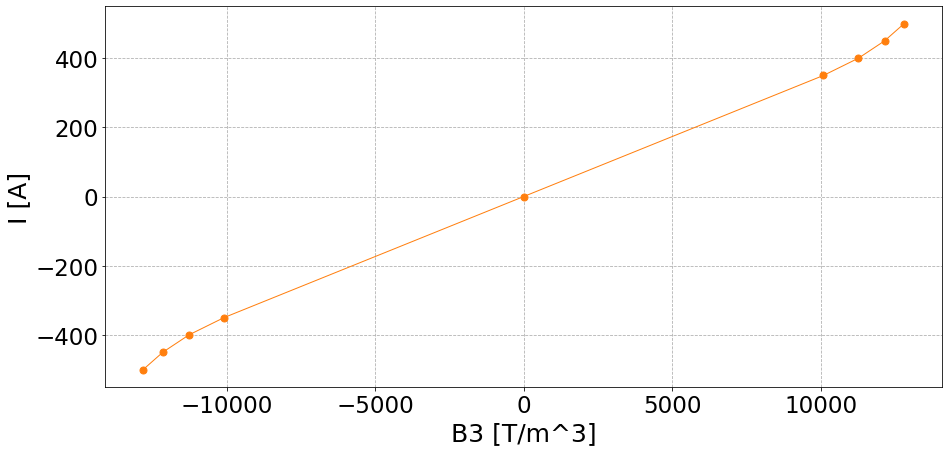

In [22]:
fig, ax = plt.subplots(1,1)
ax.plot(b3l_lof/length_lof, current_lof, '-o', c='C1')
ax.grid(ls='--')


ax.set_ylabel('I [A]')
ax.set_xlabel('B3 [T/m^3]')

In [23]:
# linear fit

In [24]:
def objective_linear(x, a, f):
    return (a * x) + f

In [25]:
current_lof[3:6]

4   -350.0
5      0.0
6    350.0
Name: SPS-LOF-B3DOTL: BL_FIELD.1, dtype: float64

In [26]:
# choose the input and output variables
x, y = b3l_lof[3:6]/length_lof, current_lof[3:6]
# curve fit
# summarize the parameter values
popt, _ = curve_fit(objective_linear, x, y)
a, f = popt
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective_linear(x_line, a, f)

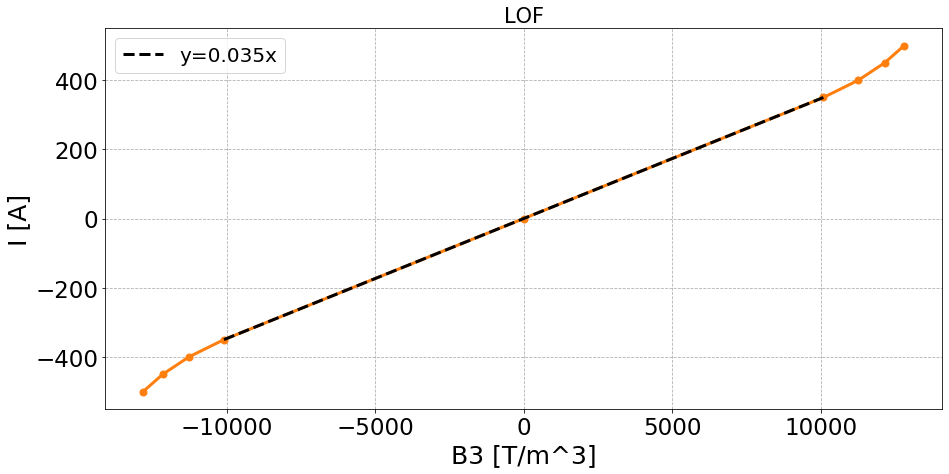

In [27]:
fig, ax = plt.subplots(1,1)
ax.plot(b3l_lof/length_lof, current_lof, '-o', lw=3, c='C1')
ax.plot(x_line,y_line, '--', lw=3, color='k', label=f'y={a:.3f}x')

ax.grid(ls='--')

#ax.set_xticks(np.arange(-10000, 10010, 2000))
ax.legend()
ax.set_ylabel('I [A]')
ax.set_xlabel('B3 [T/m^3]')
ax.set_title('LOF')

plt.savefig('SPS_lof_callibration_curve.png', bbox_inches='tight')

### LOD

In [28]:
# choose the input and output variables
x, y = b3l_lod[4:7]/length_lod, current_lod[4:7]
# curve fit
# summarize the parameter values
popt, _ = curve_fit(objective_linear, x, y)
a, f = popt
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective_linear(x_line, a, f)

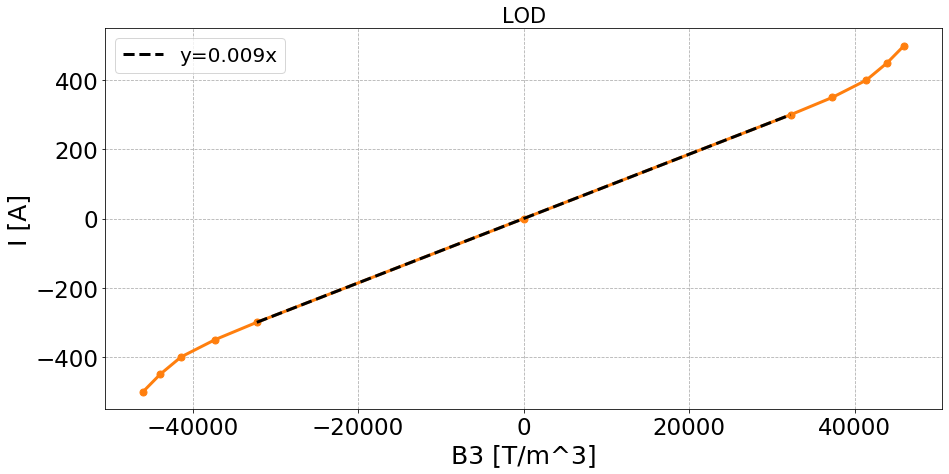

In [29]:
fig, ax = plt.subplots(1,1)
ax.plot(b3l_lod/length_lod, current_lod, '-o', lw=3, c='C1')
ax.plot(x_line,y_line, '--', lw=3, color='k', label=f'y={a:.3f}x')

ax.grid(ls='--')

ax.set_title('LOD')

#ax.set_xticks(np.arange(-10000, 10010, 2000))
ax.legend()
ax.set_ylabel('I [A]')
ax.set_xlabel('B3 [T/m^3]')

plt.savefig('SPS_lod_callibration_curve.png', bbox_inches='tight')

### Fit in higher order

In [108]:
a

0.02187114503871485

In [ ]:
### Check higher order fit

In [41]:
def objective(x, a, b, c, d, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + f #(e * x**5) + f

In [42]:
# choose the input and output variables
x, y = b3l_lof/length_lof, current_lof
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c, d, f = popt
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d,  f)
print(1/a)

37.16109147026401


Text(0.5, 0, 'B3 [T/m^3]')

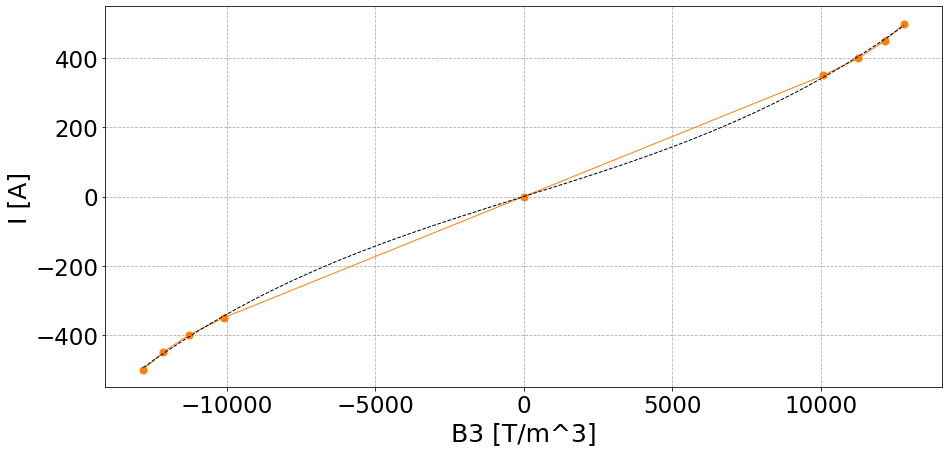

In [43]:
fig, ax = plt.subplots(1,1)
ax.plot(b3l_lof/length_lof,current_lof,  '-o', c='C1')
ax.plot(x_line, y_line, '--', color='k')

ax.grid(ls='--')

ax.set_ylabel('I [A]')
ax.set_xlabel('B3 [T/m^3]')

In [51]:
def objective(x, a, b, c, f):
    return (a * x) + (b * x**2) + (c * x**3) + f #(e * x**5) + f

In [52]:
# choose the input and output variables
x, y = b3l_lof/length_lof, current_lof
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c, f = popt
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, f)
print(1/a)

37.16109108296835


Text(0.5, 0, 'B3 [T/m^3]')

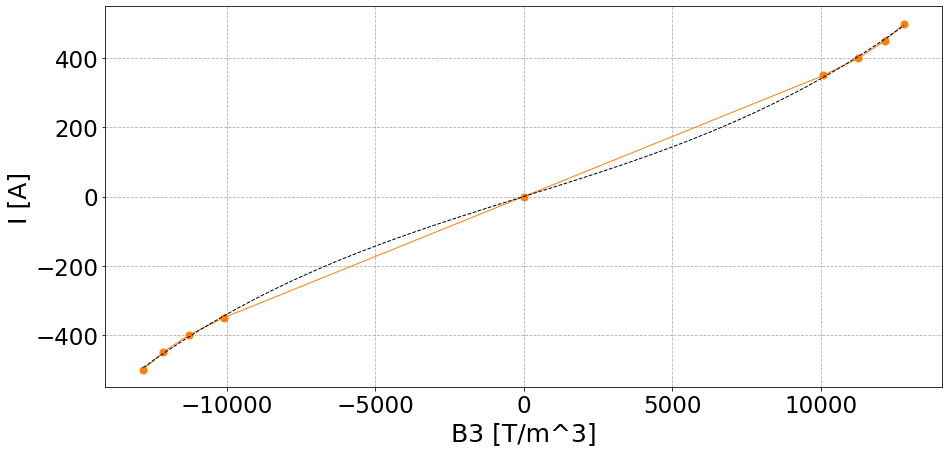

In [53]:
fig, ax = plt.subplots(1,1)
ax.plot(b3l_lof/length_lof,current_lof,  '-o', c='C1')
ax.plot(x_line, y_line, '--', color='k')

ax.grid(ls='--')

ax.set_ylabel('I [A]')
ax.set_xlabel('B3 [T/m^3]')

In [54]:
a

0.026909866499003832

In [55]:
def objective(x, a, b, f):
    return (a * x) + (b * x**2)+f

In [56]:
# choose the input and output variables
x, y = b3l_lof/length_lof, current_lof
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, f = popt
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, f)
print(1/a)

27.139213385225773


Text(0.5, 0, 'B3 [T/m^3]')

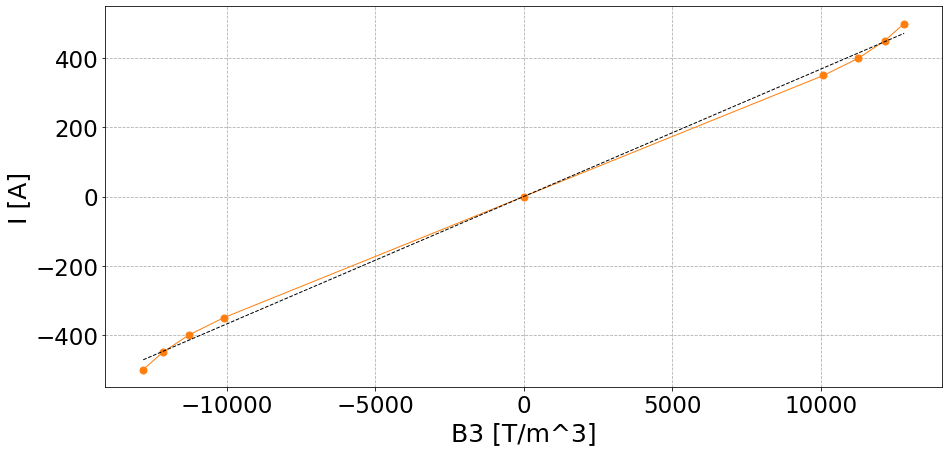

In [57]:
fig, ax = plt.subplots(1,1)
ax.plot(b3l_lof/length_lof,current_lof,  '-o', c='C1')
ax.plot(x_line, y_line, '--', color='k')

ax.grid(ls='--')

ax.set_ylabel('I [A]')
ax.set_xlabel('B3 [T/m^3]')

In [58]:
a

0.03684705174779998